# R and Python Analytics via Jupyter, Reticulate, and BigFix

In [4]:
# First Look for BFcredentials.json in the parent directory listing
setwd('~/dev/py/bfReSTexamplesInstructions/configNquery/')
list.files('..')

[1] "add.py"                                                                                                   
 [2] "baseline_template.bes"                                                                                    
 [3] "baselineActionReport.bes"                                                                                 
 [4] "bfClientSetting"                                                                                          
 [5] "BFcredentials.json"                                                                                       
 [6] "completedBaseline.bes"                                                                                    
 [7] "configNquery"                                                                                             
 [8] "configNquery.ipynb"                                                                                       
 [9] "configNquery.py"                                                                                          
[10] "createComputerGroup.py"                                                                                   
[11] "createComputerGroup2.py"                                                                                  
[12] "credentials.json"                                                                                         
[13] "cycleGather.py"                                                                                           
[14] "cycleGather.xml"                                                                                          
[15] "doc"                                                                                                      
[16] "executeActionList4IEM.py"                                                                                 
[17] "file.xml"                                                                                                 
[18] "fixedFixlets.txt"                                                                                         
[19] "getAssetsNCheckinTime.py"                                                                                 
[20] "getFixlets2DictUrllib3.py"                                                                                
[21] "getFixletsRest.py"                                                                                        
[22] "getFixletsRest2File.py"                                                                                   
[23] "getFixletsRest2File2.py"                                                                                  
[24] "getFixletsRestAdonix.py"                                                                                  
[25] "getFixletsRestAdonixUrllib.py"                                                                            
[26] "getFixletsRestGrass.py"                                                                                   
[27] "Grasskeet-CriticalVulns-baseline.bes"                                                                     
[28] "importTweedleDeeFixlet.py"                                                                                
[29] "importTweedleDeeFixlet3.py"                                                                               
[30] "invokeBesProvisioning.xml"                                                                                
[31] "InvokeFixletRestViaPython.docx"                                                                           
[32] "InvokeFixletRestViaPython.pdf"                                                                            
[33] "InvokeFixletRestViaPython2.pdf"                                                                           
[34] "Jamf"                                                                                                     
[35] "Li3000.txt"                                                                                               
[36] "MasterSite_FixletA.bes"                 

**install/instantiate Reticulate library using install.packages('reticulate') and library('reticulate'), then 'pull in' rdConfigNqueryBF.py**

In [5]:
# install.packages('reticulate')
library("reticulate")
source_python("rcqLambdas.py")
source_python("rdConfigNqueryBF.py")


** OK, Let's read the credential.json file so we can use the configuration in subsequent calls **

In [7]:
rCfg<-"../credentials.json"
myCfg<-readConfig(rCfg)

**As a 'confidence-test', get a particular set of computer names and include their last 'checkin time'**

In [18]:
# Create a 'relevance string and query the BigFix server 
# We're looking for all endpoints containing "ADHAY" in the name and their last checkin time
# (notice encoding of double-quote and ampersand characters)
newRelevance<-"(name of it %26 %22%3e%22 %26 (last report time of it) as string) of bes computers whose (name of it as lowercase contains %22adhay%22)"
xmlResult<-queryBFviaRelevance(myCfg,newRelevance)

# Using the second lambda function we defined for parsing bes computers, 
# return a dataframe of tuples split by ">"
df0<-computersLf2(xmlResult)

# Now clean up the data & rename the columns appropriately, displaying a sample
names(df0)<-c("Endpoint Name","Last Checkin Time")
head(df0)

# Let's see how many tuples we have...
str(df0)

Endpoint Name,Last Checkin Time
ADHAYGAP21,"Fri, 10 Aug 2018 11:42:30 -0700"
ADHAYVCR01,"Fri, 10 Aug 2018 11:44:35 -0700"
ADHAYFDB01,"Fri, 10 Aug 2018 10:59:38 -0700"
ADHAYGAP16,"Fri, 10 Aug 2018 11:37:29 -0700"
ADHAYWEB08,"Fri, 10 Aug 2018 11:44:32 -0700"
ADHAYFIM01,"Fri, 10 Aug 2018 11:17:05 -0700"


'data.frame':	143 obs. of  2 variables:
 $ Endpoint Name    : chr  "ADHAYGAP21" "ADHAYVCR01" "ADHAYFDB01" "ADHAYGAP16" ...
 $ Last Checkin Time: chr  "Fri, 10 Aug 2018 11:42:30 -0700" "Fri, 10 Aug 2018 11:44:35 -0700" "Fri, 10 Aug 2018 10:59:38 -0700" "Fri, 10 Aug 2018 11:37:29 -0700" ...
 - attr(*, "pandas.index")=RangeIndex(start=0, stop=143, step=1)


**Finally, let's get the Active Directory information, displayed in a table**

In [39]:
# Solving another problem: Let's look at the active-directory users who've recently logged onto the workstation
#
# Create a 'relevance string and query the BigFix server for all endpoints containing "ADHAY" in the name, 
# their ComputerName and the last Active Directory logged-on user

# BTW, (notice the encoding of double-quotes (%22), ">" (%3e), and ampersand (%26) characters)
newRelevance<-"(name of it %26 %22,%22 %26 (concatenation %22 , %22 of (values of results from (bes property %22Active Directory Local User Info%22) of it as string))) of bes computers whose (name of it as lowercase contains %22adhay%22)"

xmlResult<-queryBFviaRelevance(myCfg,newRelevance)
#xmlResult

# Using the second lambda function we defined for parsing bes computers, 
# clean up the dataframe renaming columns to something descriptive
df1<-computersLf3(xmlResult)
names(df1)<-c("Endpoint Name","(Login Disk","AD User","Login Time)...")
df1[1,]
df1[1,5]
head(df1)



Endpoint Name,(Login Disk,AD User,Login Time)...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ADHAYGAP21,C,admin_csuhad,( Fri,10 Aug 2018 11:25:02 -0700 ),H:,ag7287,( Fri,10 Aug 2018 10:34:23 -0700 ),C,rk6682,( Fri,10 Aug 2018 10:19:29 -0700 ),NULL,NULL,NULL,NULL


[[1]]
[1] " 10 Aug 2018 11:25:02 -0700 ) "

Endpoint Name,(Login Disk,AD User,Login Time)...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ADHAYGAP21,C,admin_csuhad,( Fri,10 Aug 2018 11:25:02 -0700 ),H:,ag7287,( Fri,10 Aug 2018 10:34:23 -0700 ),C,rk6682,( Fri,10 Aug 2018 10:19:29 -0700 ),NULL,NULL,NULL,NULL
ADHAYVCR01,C:,cm8758,( Fri,10 Aug 2018 11:56:23 -0700 ),NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
ADHAYFDB01,C,rk6682,( Fri,10 Aug 2018 10:19:29 -0700 ),C,cm8758,( Fri,10 Aug 2018 11:56:23 -0700 ),C,ge4357,( Wed,13 Jun 2018 05:34:09 -0700 ),H:,wx6242,( Fri,10 Aug 2018 11:56:02 -0700 )
ADHAYGAP16,C:,cm8758,( Fri,10 Aug 2018 09:55:03 -0700 ),H:,xb5538,( Fri,10 Aug 2018 11:02:49 -0700 ),H:,vu4555,( Fri,10 Aug 2018 00:41:05 -0700 ),NULL,NULL,NULL,NULL
ADHAYWEB08,C:,admin_csuhad,( Fri,10 Aug 2018 11:25:02 -0700 ),NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
ADHAYFIM01,C,admin_csuhad,( Fri,10 Aug 2018 11:25:02 -0700 ),H:,ag7287,( Fri,10 Aug 2018 10:34:23 -0700 ),C,rk6682,( Fri,10 Aug 2018 10:19:29 -0700 ),NULL,NULL,NULL,NULL


**OK, Let's look at the OS - If W7, initial install date; if W10; upgrade date....**

In [55]:
# Create a 'relevance string and query the BigFix server 
# We're looking for all endpoints containing "ADHAY" in the name and their last checkin time
# (notice encoding of double-quote and ampersand characters)
                                       
newRelevance<-"(name of it %26 %22,%22 %26  operating system of it %26 %22,%22 %26 value of it of results from (bes property %22InitialInstallDate%22) of it) of bes computers whose (name of it as lowercase contains %22adhay%22  and exists value of it of results (it, bes property %22InitialInstallDate%22))"
xmlResult<-queryBFviaRelevance(myCfg,newRelevance)

# Using the second lambda function we defined for parsing bes computers, 
# return a dataframe of tuples split by ">"
df2<-computersLf3(xmlResult)
# Now clean up the data & rename the columns appropriately, displaying a sample
names(df2)<-c("Endpoint Name","Operating system","DOW","InstallDate")
dateFmt<-"%d %b %Y %H:%M:%S %z"
df2$InitialInstallDate<-as.Date(df2[,"InstallDate"],dateFmt)
df2$InstallDate<-NULL
df2$DOW<-NULL

head(df2)

# Let's see how many tuples we have...
str(df2)

Endpoint Name,Operating system,InitialInstallDate
ADHAYGAP21,Win2012R2 6.3.9600,2016-07-28
ADHAYVCR01,Win2012R2 6.3.9600,2016-06-08
ADHAYFDB01,Win2008R2 6.1.7601,2015-09-20
ADHAYGAP16,Win2012R2 6.3.9600,2017-03-16
ADHAYWEB08,Win2012R2 6.3.9600,2017-05-02
ADHAYFIM01,Win2008R2 6.1.7601,2016-03-13


'data.frame':	143 obs. of  3 variables:
 $ Endpoint Name     : chr  "ADHAYGAP21" "ADHAYVCR01" "ADHAYFDB01" "ADHAYGAP16" ...
 $ Operating system  : chr  "Win2012R2 6.3.9600" "Win2012R2 6.3.9600" "Win2008R2 6.1.7601" "Win2012R2 6.3.9600" ...
 $ InitialInstallDate: Date, format: "2016-07-28" "2016-06-08" ...
 - attr(*, "pandas.index")=RangeIndex(start=0, stop=143, step=1)


In [39]:
df0$LastReportTimeDate<-as.Date(df0[,"Last Checkin Time"],dateFmt)
df0$InitialInstallDate<-as.Date(df0[,"Initial Install Date"],dateFmt)
df0$Lifetime<-df0$LastReportTimeDate-df0$InitialInstallDate
df0$LastReportTimeDate<-NULL
df0$InitialInstallDate<-NULL
head(df0)

ERROR: Error in strptime(x, format, tz = "GMT"): object 'dateFmt' not found


In [43]:
str(df0)

'data.frame':	143 obs. of  4 variables:
 $ Endpoint Name       : chr  "ADHAYGAP21" "ADHAYVCR01" "ADHAYFDB01" "ADHAYGAP16" ...
 $ Last Checkin Time   : chr  "Mon, 06 Aug 2018 12:46:44 -0700" "Mon, 06 Aug 2018 12:55:27 -0700" "Mon, 06 Aug 2018 12:05:47 -0700" "Mon, 06 Aug 2018 12:46:35 -0700" ...
 $ Initial Install Date: chr  "Wed, 27 Jul 2016 17:08:32 -0700" "Wed, 08 Jun 2016 10:33:56 -0700" "Sun, 20 Sep 2015 08:53:24 -0700" "Thu, 16 Mar 2017 09:38:15 -0700" ...
 $ Lifetime            :Class 'difftime'  atomic [1:143] 739 789 1051 508 461 ...
  .. ..- attr(*, "units")= chr "days"
 - attr(*, "pandas.index")=RangeIndex(start=0, stop=143, step=1)


## Finally! A Useful Graph...

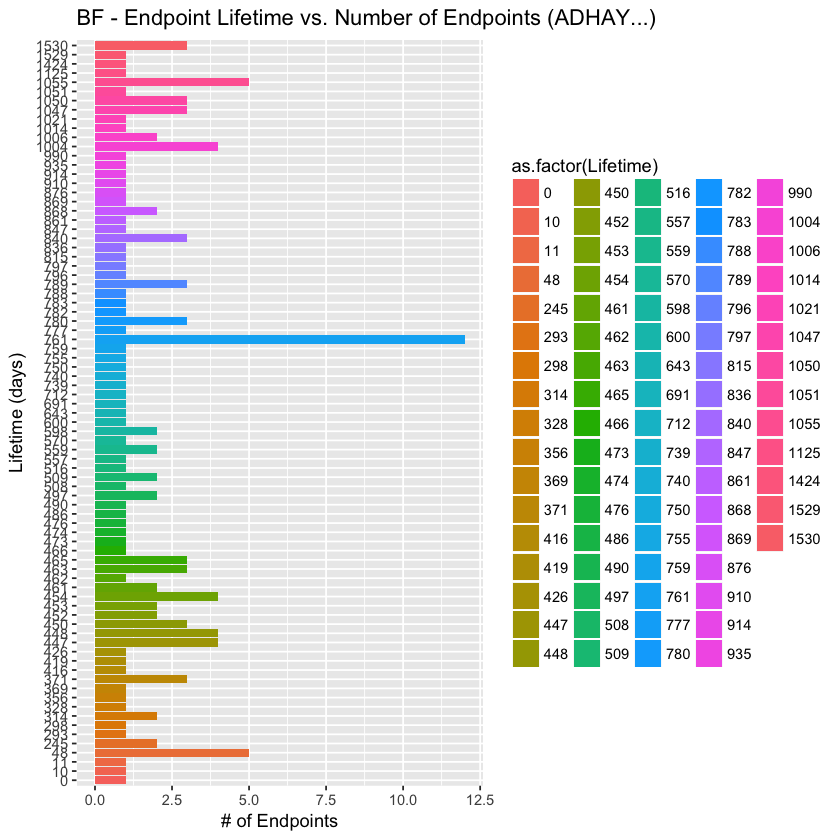

In [44]:
library('ggplot2')
ggplot(df0, aes(x=as.factor(Lifetime), fill=as.factor(Lifetime) )) +  geom_bar( ) + coord_flip() + labs(title="BF - Endpoint Lifetime vs. Number of Endpoints (ADHAY...)", x = "Lifetime (days)", y="# of Endpoints")